In [7]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Organize and Clean Data. 
Data obtained from: https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2022-050423.txt
- create index 
- add column labels
- generate dates from column 1

## HURDAT2 file layout: 
were given names (actually numbers, such as “TEN”) that were included into the ATCF b-decks starting in 2003. Non-developing tropical
depressions before this year are also referred to as “UNNAMED”.
The remaining rows of data in the new format are the data lines. These have the following format:
20210829, 1655, L, HU, 29.1N, 90.2W, 130, 931, 130, 110, 80, 110, 70, 60, 40, 60, 45, 35, 20, 30, 10
12345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345
2021 (Spaces 1-4) – Year
08 (Spaces 5-6) – Month
29 (Spaces 7-8, before 1st comma) – Day
16 (Spaces 11-12) – Hours in UTC (Universal Time Coordinate)
55 (Spaces 13-14, before 2nd comma) – Minutes
L (Space 17, before 3rd comma) – Record identifier (see notes below)
    C – Closest approach to a coast, not followed by a landfall
    G – Genesis
    I – An intensity peak in terms of both pressure and wind
    L – Landfall (center of system crossing a coastline)
    P – Minimum in central pressure
    R – Provides additional detail on the intensity of the cyclone when rapid changes are underway
    S – Change of status of the system
    T – Provides additional detail on the track (position) of the cyclone
    W – Maximum sustained wind speed
HU (Spaces 20-21, before 4th comma) – Status of system. Options are:
    TD – Tropical cyclone of tropical depression intensity (< 34 knots)
    TS – Tropical cyclone of tropical storm intensity (34-63 knots)
    HU – Tropical cyclone of hurricane intensity (> 64 knots)
    EX – Extratropical cyclone (of any intensity)
    SD – Subtropical cyclone of subtropical depression intensity (< 34 knots)
    SS – Subtropical cyclone of subtropical storm intensity (> 34 knots)
    LO – A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)
    WV – Tropical Wave (of any intensity)
    DB – Disturbance (of any intensity)
29.1 (Spaces 24-27) – Latitude
N (Space 28, before 5th comma) – Hemisphere – North or South
90.2 (Spaces 31-35) – Longitude
W (Space 36, before 6th comma) – Hemisphere – West or East
130 (Spaces 39-41, before 7th comma) – Maximum sustained wind (in knots)
931 (Spaces 44-47, before 8th comma) – Minimum Pressure (in millibars)
130 (Spaces 50-53, before 9th comma) – 34 kt wind radii maximum extent in northeastern quadrant (in nautical miles)
110 (Spaces 56-59, before 10th comma) – 34 kt wind radii maximum extent in southeastern quadrant (in nautical miles)
70 (Spaces 62-65, before 11th comma) – 34 kt wind radii maximum extent in southwestern quadrant (in nautical miles)
60 (Spaces 68-71, before 12th comma) – 34 kt wind radii maximum extent in northwestern quadrant (in nautical miles)
40 (Spaces 74-77, before 13th comma) – 50 kt wind radii maximum extent in northeastern quadrant (in nautical miles)
60 (Spaces 80-83, before 14th comma) – 50 kt wind radii maximum extent in southeastern quadrant (in nautical miles)
80 (Spaces 86-89, before 15th comma) – 50 kt wind radii maximum extent in southwestern quadrant (in nautical miles)
30 (Spaces 92-95, before 16th comma) – 50 kt wind radii maximum extent in northwestern quadrant (in nautical miles)
45 (Spaces 98-101, before 17th comma) – 64 kt wind radii maximum extent in northeastern quadrant (in nautical miles)
25 (Spaces 104-107, before 18th comma) – 64 kt wind radii maximum extent in southeastern quadrant (in nautical miles)
35 (Spaces 110-113, before 19th comma) – 64 kt wind radii maximum extent in southwestern quadrant (in nautical miles)
20 (Spaces 116-119, before 20th comma) – 64 kt wind radii maximum extent in northwestern quadrant (in nautical miles)
15 (Spaces 122-125) – Radius of Maximum Wind (in nautical miles)

In [2]:
data_labels = ['Date',
              'UTC',
              'Record_Identifier',
              'Status',
              'Latitude',
              'Longitude',
              'Max_Wind_kts',
              'Min_Pressure_mbar',
              'low_wind_NE',
              'low_wind_SE',
              'low_wind_SW',
              'low_wind_NW',
              'mid_wind_NE',
              'mid_wind_SE',
              'mid_wind_SW',
              'mid_wind_NW',
              'high_wind_NE',
              'high_wind_SE',
              'high_wind_SW',
              'high_wind_NW',
              'Max_Wind_radius']
len(data_labels)

21

In [3]:
# Load data
raw_data = pd.read_csv('data/hurdat2-1851-2022-050423.txt',
                      header=None, names=data_labels, skipinitialspace = True)
clean_data = raw_data.copy() # Make a copy to mess around with. 

# Data Preprocessing

In [5]:
clean_data

,Date,UTC,Record_Identifier,Status,Latitude,Longitude,Max_Wind_kts,Min_Pressure_mbar,low_wind_NE,low_wind_SE,...,low_wind_NW,mid_wind_NE,mid_wind_SE,mid_wind_SW,mid_wind_NW,high_wind_NE,high_wind_SE,high_wind_SW,high_wind_NW,Max_Wind_radius
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0000,NaN,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,18510625,0600,NaN,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,18510625,1200,NaN,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,18510625,1800,NaN,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55923,20221110,1900,L,TS,29.2N,83.0W,40.0,989.0,200.0,60.0,...,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
55924,20221111,0000,L,TS,30.1N,84.0W,35.0,992.0,200.0,60.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
55925,20221111,0600,NaN,TD,31.2N,84.6W,30.0,996.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
55926,20221111,1200,NaN,TD,33.2N,84.6W,25.0,999.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0


In [6]:
# Move Storm Label to new column
# Thanks ChatGPT

# Step 1: Identify rows with the storm identifier
identifier_rows = clean_data['Date'].str.startswith('AL')

# Step 2: Extract the storm identifier and create a new column
clean_data['Storm_ID'] = clean_data.loc[identifier_rows, 'Date']
clean_data['Storm_ID'] = clean_data['Storm_ID'].ffill()

# Step 3: Remove rows with the storm identifier
clean_data = clean_data[~identifier_rows]

# Reset the index if needed
clean_data.reset_index(drop=True, inplace=True)


In [7]:
clean_data.Storm_ID

0        AL011851
1        AL011851
2        AL011851
3        AL011851
4        AL011851
           ...   
53971    AL172022
53972    AL172022
53973    AL172022
53974    AL172022
53975    AL172022
Name: Storm_ID, Length: 53976, dtype: object

In [8]:
# Convert Latitude and Longitude to floats for model. 
# stupid dataframe fuckery. 

clean_data.Latitude = clean_data.Latitude.str.strip('N').astype('float64')

# Function to process and convert longitude values
# Provided by ChatGPT, as my attempt did not work. 
def process_longitude(longitude_str):
    direction = longitude_str[-1]
    value = float(longitude_str[:-1])
    return -value if direction == 'W' else value

# Apply the function to the column
clean_data.loc[:,'Longitude'] = clean_data.loc[:,'Longitude'].apply(process_longitude)
clean_data['Longitude'] = clean_data.Longitude.astype('float64')

C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17584\803324326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.Latitude = clean_data.Latitude.str.strip('N').astype('float64')
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17584\803324326.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Longitude'] = clean_data.Longitude.astype('float64')


In [10]:
# Combine 'Date' and 'Time' into one datetime object
# This code is very inefficient (for loop.... ),
# Needs optimization. 
for i in range(0, len(clean_data)):
    clean_data.loc[i,'DateTime'] = datetime.strptime(clean_data.loc[i,'Date'] + clean_data.loc[i,'UTC'], 
                                                     '%Y%m%d%H%M')

# Drop the original 'Date' and 'Time' columns if needed
clean_data.drop(['Date', 'UTC'], axis=1, inplace=True)
#clean_data

# Fill NaN with 0
for column in clean_data:
    clean_data[column] = clean_data[column].fillna(0)

C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17584\296116728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[i,'DateTime'] = datetime.strptime(clean_data.loc[i,'Date'] + clean_data.loc[i,'UTC'],
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17584\296116728.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(['Date', 'UTC'], axis=1, inplace=True)
C:\Users\Nikolas\AppData\Local\Temp\ipykernel_17584\296116728.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [12]:
clean_data.to_csv('data/hurdat2_clean.csv')

## Procrastination: visualize Storm paths using cartopy

In [13]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [14]:
# Strip spaces and 'N's and 'W's from columns. 
# Discussion on the fastest way of stripping multiple characters: 
# https://stackoverflow.com/questions/3900054/python-strip-multiple-characters

storm_01 = clean_data[clean_data.Storm_ID == 'AL011851']
lats = storm_01.Latitude.to_list()
lons = storm_01.Longitude.to_list()
lons = [i for i in lons]
lat, lons

NameError: name 'lon' is not defined

In [15]:
def plot_data(selection):
    """
    Return a list of latitudes and a list of longitudes (lats, lons)
    for a given selection from a pandas data frame
    """
    storm = clean_data[clean_data.Storm_ID == selection]
    lats  = storm.Latitude.to_list()
    lons  = storm.Longitude.to_list()
   
    return lats, lons

lats, lons = plot_data('AL172022')

In [16]:
def plot_storm(selection):
    """
    Return a cartopy object that plots the course 
    of a hurricane across the Atlantic Basin
    
    Source for plotting function:
    http://scitools.org.uk/cartopy/docs/latest/
    gallery/lines_and_polygons/hurricane_katrina.html
    """
        
    
    fig = plt.figure()
    lats, lons = plot_data(selection)
    
    # to get the effect of having just the states without a map "background"
    # turn off the background patch and axes frame
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree(),
                      frameon=False)
    ax.patch.set_visible(False)
    
    # set_extent vars: [longitude_max/Western_bound, 
    #                   longitude_min/Eastern_bound, 
    #                   latitude_min/Southern_bound, 
    #                   latitude_max/Northern_Bound]
    ax.set_extent([-125, -0, 0, 50], ccrs.Geodetic())


    #lons, lats = sample_data()
    #ax.scatter(lons, lats, color='blue', label='Dataset 1')
    ax.set_title(selection)

    # turn the lons and lats into a shapely LineString
    track = sgeom.LineString(zip(lons, lats))

    # buffer the linestring by two degrees (note: this is a non-physical
    # distance)
    track_buffer = track.buffer(2)

    ax.coastlines()
    ax.gridlines(draw_labels=True, linestyle='--')
    ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                      facecolor='#C8A2C8', alpha=0.5)
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='k')

    print(lats)
    print(lons)
    plt.show()

[20.6, 22.4, 23.9, 25.2, 25.9, 26.4, 26.8, 27.5, 27.7, 27.6, 27.2, 26.8, 26.5, 26.5, 26.5, 26.6, 26.7, 27.3, 27.6, 28.0, 29.0, 29.2, 30.1, 31.2, 33.2, 35.4]
[-66.8, -66.8, -67.5, -68.2, -69.3, -70.3, -70.7, -71.2, -72.1, -73.3, -74.3, -75.3, -76.2, -77.1, -77.3, -78.2, -78.4, -79.8, -80.3, -81.6, -82.8, -83.0, -84.0, -84.6, -84.6, -83.8]


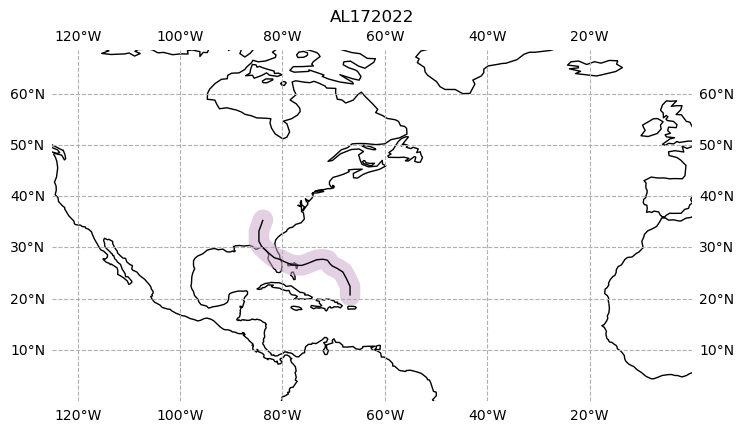

In [17]:
plot_storm('AL172022')

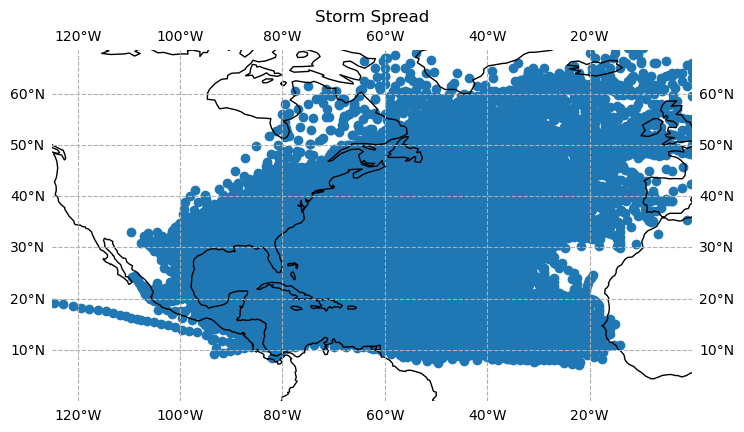

In [18]:
fig = plt.figure()
lats  = clean_data.Latitude.to_list()
lons  = clean_data.Longitude.to_list()

# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree(),
                  frameon=False)
ax.patch.set_visible(False)

# set_extent vars: [longitude_max/Western_bound, 
#                   longitude_min/Eastern_bound, 
#                   latitude_min/Southern_bound, 
#                   latitude_max/Northern_Bound]
ax.set_extent([-125, -0, 0, 50], ccrs.Geodetic())


#lons, lats = sample_data()
#ax.scatter(lons, lats, color='blue', label='Dataset 1')
ax.set_title('Storm Spread')

# turn the lons and lats into a shapely LineString
#track = sgeom.LineString(zip(lons, lats))

# buffer the linestring by two degrees (note: this is a non-physical
# distance)
#track_buffer = track.buffer(2)

ax.scatter(lons, lats)

ax.coastlines()
ax.gridlines(draw_labels=True, linestyle='--')
#ax.add_geometries([track_buffer], ccrs.PlateCarree(),
#                  facecolor='#C8A2C8', alpha=0.5)
#ax.add_geometries([track], ccrs.PlateCarree(),
#                  facecolor='none', edgecolor='k')

plt.show()

# Data Selection and preparation
- reformat data for final analysis

In [8]:
import pandas as pd
import numpy as np
import math as Math
import matplotlib.pyplot as plt
from datetime import datetime
from pickle import dump

import pyproj as proj
from geopy.distance import great_circle as vc

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
# Read up on pep8 implementation in 
# jupyter notebook for procrastination
# https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code#47204361

In [18]:
# Load dataset
dat = pd.read_csv('data/hurdat2_clean.csv')
df = dat.loc[:, [ 'Min_Pressure_mbar', 'DateTime', 'Storm_ID', 'Latitude', 'Longitude']]

In [19]:
df

,Min_Pressure_mbar,DateTime,Storm_ID,Latitude,Longitude
0,-999.0,1851-06-25 00:00:00,AL011851,28.0,-94.8
1,-999.0,1851-06-25 06:00:00,AL011851,28.0,-95.4
2,-999.0,1851-06-25 12:00:00,AL011851,28.0,-96.0
3,-999.0,1851-06-25 18:00:00,AL011851,28.1,-96.5
4,-999.0,1851-06-25 21:00:00,AL011851,28.2,-96.8
...,...,...,...,...,...
53971,989.0,2022-11-10 19:00:00,AL172022,29.2,-83.0
53972,992.0,2022-11-11 00:00:00,AL172022,30.1,-84.0
53973,996.0,2022-11-11 06:00:00,AL172022,31.2,-84.6
53974,999.0,2022-11-11 12:00:00,AL172022,33.2,-84.6


In [20]:
def cleanup(df: pd.DataFrame):
    """
    Cleanup DataFrame for preprocessing
    returns clean dataframe. 
    """
    # truncate dataset to 1991-2022, whih contains the minimum pressure. 
    #rnn_dat[rnn_dat.DateTime.str.contains('^1991')]
    df = df.iloc[38290:,:].copy()

        # remove NaN rows
    #for column in df:
    #    df.loc[:,column] = df.loc[:, column].dropna()

    # factorize storm_id
    df['Storm_ID'] = pd.factorize(df['Storm_ID'])[0]
    factors = pd.factorize(df['Storm_ID'])[1]

    # encode timestamp to UNIX code
    df.loc[:,'Time'] = pd.to_datetime(df.loc[:,'DateTime'], format = '%Y-%m-%d %H:%M:%S')
    df.loc[:,'Time'] = df.loc[:,'Time'].astype('int64')

    df = df.reset_index()
    df = df.drop("index", axis = 1)
    df = df.drop("DateTime", axis = 1)

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.replace(-999.0, np.nan)
    df = df.dropna()
    
    return df

In [13]:
df = cleanup(df)
df.to_

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time
0,1012.0,0,25.9,-78.0,678196800000000000
1,1012.0,0,25.9,-79.0,678218400000000000
2,1012.0,0,25.9,-80.0,678240000000000000
3,1012.0,0,26.0,-80.9,678261600000000000
4,1012.0,0,26.2,-81.8,678283200000000000
...,...,...,...,...,...
15681,989.0,523,29.2,-83.0,1668106800000000000
15682,992.0,523,30.1,-84.0,1668124800000000000
15683,996.0,523,31.2,-84.6,1668146400000000000
15684,999.0,523,33.2,-84.6,1668168000000000000


# Load processed dataset

In [11]:
# Load RNN dataset
df = pd.read_csv('data/rnn_dat.csv', index_col=0)

In [12]:
df

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time
0,1012.0,0,25.9,-78.0,678196800000000000
1,1012.0,0,25.9,-79.0,678218400000000000
2,1012.0,0,25.9,-80.0,678240000000000000
3,1012.0,0,26.0,-80.9,678261600000000000
4,1012.0,0,26.2,-81.8,678283200000000000
...,...,...,...,...,...
15681,989.0,523,29.2,-83.0,1668106800000000000
15682,992.0,523,30.1,-84.0,1668124800000000000
15683,996.0,523,31.2,-84.6,1668146400000000000
15684,999.0,523,33.2,-84.6,1668168000000000000


# Data visualization

In [13]:
# Check dataset for outliers. 

def analyze(label: str, column):
    """
    Get min, max, mean of a column. 
    This could be skipped with a df.describe(). 
    """
    print("{}: ".format(label), 
      "Minimum: {}".format(min(column)), 
      "Maximum: {}".format(max(column)),
      "Mean: {}".format(column.mean())
     )

analyze("Pressure", df["Min_Pressure_mbar"])
analyze("Time", df["Time"])
analyze("X", df["Latitude"])
analyze("Y", df["Longitude"])

Pressure:  Minimum: 882.0 Maximum: 1024.0 Mean: 993.1858802502234
Time:  Minimum: 678196800000000000 Maximum: 1668189600000000000 Mean: 1.2137664757372654e+18
X:  Minimum: 7.0 Maximum: 70.7 Mean: 27.03963360142985
Y:  Minimum: -136.9 Maximum: 13.5 Mean: -61.29774032937571


Text(0.5, 0.98, 'Observation distributions')

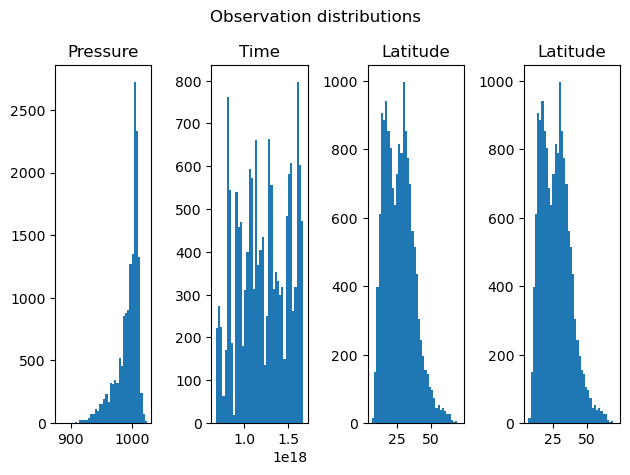

In [14]:
# Plot data distribution
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
ax1.hist(df["Min_Pressure_mbar"], bins=40)
ax1.set_title("Pressure")

ax2.hist(df["Time"], bins=40)
ax2.set_title("Time")

ax3.hist(df["Latitude"], bins=40)
ax3.set_title("Latitude")

ax4.hist(df["Latitude"], bins=40)
ax4.set_title("Latitude")


fig.suptitle('Observation distributions')

Text(0.5, 1.0, 'Hurricane Trajectories')

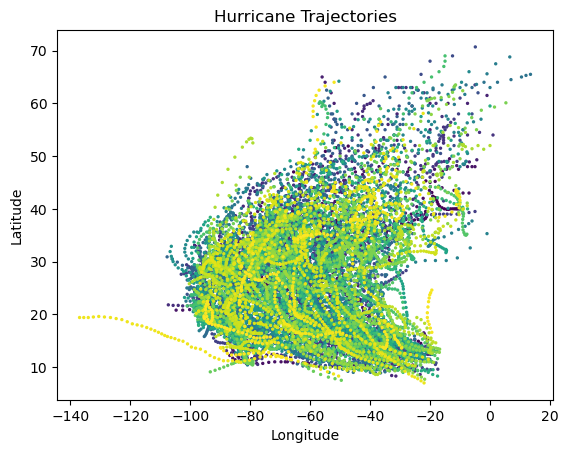

In [15]:
# plot trajectories of all hurricanes. 
fig, ax5 = plt.subplots(1, 1)
ax5.scatter(df["Longitude"], df["Latitude"], 
            s = 2, c=df["Storm_ID"])
ax5.set_xlabel('Longitude')
ax5.set_ylabel('Latitude')
ax5.set_title('Hurricane Trajectories')


In [9]:
# Load RNN dataset
df = pd.read_csv('data/rnn_dat.csv', index_col=0)
df.describe()

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time
count,15666.000000,15666.000000,15666.000000,15666.000000,1.566600e+04
mean,993.185880,264.406358,27.039634,-61.297740,1.213766e+18
std,19.029912,148.944226,10.637424,21.281718,2.804946e+17
min,882.000000,0.000000,7.000000,-136.900000,6.781968e+17
25%,986.000000,135.000000,18.200000,-78.600000,9.725670e+17
50%,1000.000000,264.000000,26.600000,-62.400000,1.216642e+18
75%,1007.000000,396.000000,33.800000,-45.000000,1.473962e+18
max,1024.000000,523.000000,70.700000,13.500000,1.668190e+18


In [10]:
# convert 2D LatLon to 1D gridID

# These variable are hyperparameters
lat_min = 7  # min(df['Latitude'])
lat_max = 70.7 # max(df['Latitude'])
long_min = -136.9 # min(df['Longitude'])
long_max = 13.5 # max(df['Longitude'])

lat_interval = round(lat_max - lat_min)
long_interval = round(long_max - long_min)

Latitude_normalized = np.floor(df['Latitude'] - lat_min)* long_interval
Longitude_normalized = np.floor(df['Longitude'] - long_min)

df['gridID'] = round(Latitude_normalized + Longitude_normalized)


In [11]:
df.describe()

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID
count,15666.000000,15666.000000,15666.000000,15666.000000,1.566600e+04,15666.000000
mean,993.185880,264.406358,27.039634,-61.297740,1.213766e+18,3015.235287
std,19.029912,148.944226,10.637424,21.281718,2.804946e+17,1602.373528
min,882.000000,0.000000,7.000000,-136.900000,6.781968e+17,85.000000
25%,986.000000,135.000000,18.200000,-78.600000,9.725670e+17,1702.000000
50%,1000.000000,264.000000,26.600000,-62.400000,1.216642e+18,2920.000000
75%,1007.000000,396.000000,33.800000,-45.000000,1.473962e+18,3997.750000
max,1024.000000,523.000000,70.700000,13.500000,1.668190e+18,9582.000000


Text(0.5, 0.98, 'Observation distributions')

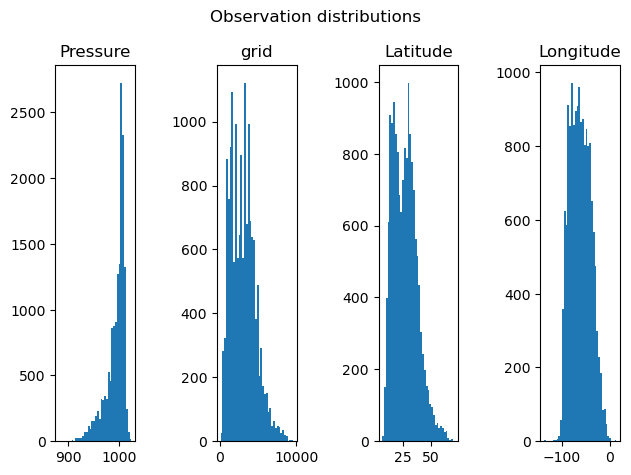

In [12]:
# Plot data distribution
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
ax1.hist(df["Min_Pressure_mbar"], bins=40)
ax1.set_title("Pressure")

ax2.hist(df["gridID"], bins=40)
ax2.set_title("grid")

ax3.hist(df["Latitude"], bins=40)
ax3.set_title("Latitude")

ax4.hist(df["Longitude"], bins=40)
ax4.set_title("Longitude")


fig.suptitle('Observation distributions')

In [13]:
def get_directions(df: pd.DataFrame = df):
    """
    Calculates angle (direction) and length of vector (distance)
    between two latitude/longitude points along all data points
    in df. 
    
    Returns dataframe, 
    input df with ['direction'] and ['distance'] columns
    """
    data = df.copy()
    total_hurricane_count = max(data['Storm_ID'])
    y = np.zeros(total_hurricane_count)
    data['distance'] = np.zeros(len(data))
    data['direction'] = np.zeros(len(data))

    # For all hurricanes
    for x in range(0, total_hurricane_count):
        t = pd.DataFrame(data[data['Storm_ID'] == x], 
                         columns = data.keys()).reset_index(drop = False)
        dst = 0
        prev = (0,0)

        # For all latitude and longitude points of hurricane, 
        # calculate the angle of travel and distance
        for p in zip(t['Latitude'], t['Longitude']):

            if prev == (0,0):
                prev = p
                continue 

            # Stores the distance into the DataFrame
            data.loc[t[(t['Latitude'] == p[0]) & (t['Longitude'] == p[1])]['index'].values[0], 
                     'distance'] = vc(prev,p).miles

            dLon = p[1] - prev[1];  
            temp = float(p[0]) # p[0] is a str?
            y_x = Math.sin(dLon) * Math.cos(temp);

            x_x = Math.cos(p[1]) * Math.sin(temp) - Math.sin(p[1]) * Math.cos(temp) * Math.cos(dLon);
            brng = Math.degrees(Math.atan2(y_x, x_x)) 
            if (brng < 0):
                brng+= 360;

                
            # Stores the angle of travel into the DataFrame
            data.loc[t[(t['Latitude'] == p[0]) & (t['Longitude'] == p[1])]['index'].values[0], 'direction'] = brng
            dst += vc(prev,p).miles
            prev = p
        y[x] = dst

    # Now contains the distance between all given latitude and longitude points
    hurricane_distance = pd.DataFrame(y)
    
    return data

In [14]:
data = get_directions()

In [15]:
data.describe()

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID,distance,direction
count,15666.000000,15666.000000,15666.000000,15666.000000,1.566600e+04,15666.000000,15666.000000,15666.000000
mean,993.185880,264.406358,27.039634,-61.297740,1.213766e+18,3015.235287,78.367342,171.861921
std,19.029912,148.944226,10.637424,21.281718,2.804946e+17,1602.373528,54.769225,112.385422
min,882.000000,0.000000,7.000000,-136.900000,6.781968e+17,85.000000,0.000000,0.000000
25%,986.000000,135.000000,18.200000,-78.600000,9.725670e+17,1702.000000,41.897325,71.428799
50%,1000.000000,264.000000,26.600000,-62.400000,1.216642e+18,2920.000000,69.035935,177.631702
75%,1007.000000,396.000000,33.800000,-45.000000,1.473962e+18,3997.750000,102.048680,265.399808
max,1024.000000,523.000000,70.700000,13.500000,1.668190e+18,9582.000000,532.582443,359.958290


Text(0.5, 0.98, 'distributions')

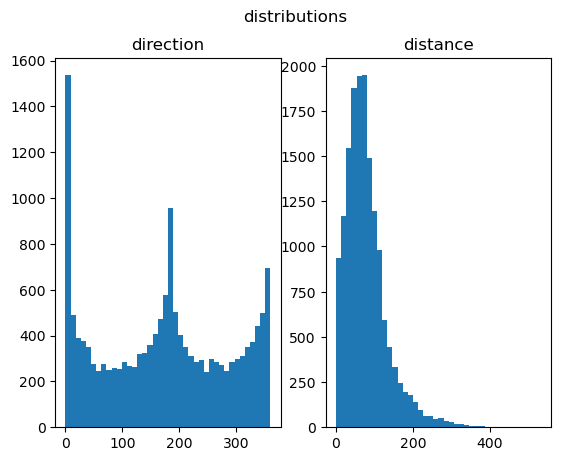

In [9]:
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.hist(data["direction"], bins = 40)
ax1.set_title("direction")
ax2.hist(data["distance"], bins=40)
ax2.set_title("distance")

fig.suptitle("distributions")

In [31]:
data

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID,distance,direction
0,1012.0,0,25.9,-78.0,678196800000000000,2758.0,0.000000,0.000000
1,1012.0,0,25.9,-79.0,678218400000000000,2757.0,62.153374,217.314797
2,1012.0,0,25.9,-80.0,678240000000000000,2756.0,62.153374,232.595676
3,1012.0,0,26.0,-80.9,678261600000000000,2906.0,56.339603,296.994789
4,1012.0,0,26.2,-81.8,678283200000000000,2905.0,57.527218,337.336848
...,...,...,...,...,...,...,...,...
15681,989.0,523,29.2,-83.0,1668106800000000000,3353.0,0.000000,0.000000
15682,992.0,523,30.1,-84.0,1668124800000000000,3502.0,0.000000,0.000000
15683,996.0,523,31.2,-84.6,1668146400000000000,3652.0,0.000000,0.000000
15684,999.0,523,33.2,-84.6,1668168000000000000,3952.0,0.000000,0.000000


In [32]:
data.to_csv('data/checkpoint-dataframe.csv') # Save the dataframe to csv for checkpoint

In [16]:
data = pd.read_csv('data/checkpoint-dataframe.csv', index_col=0) 

In [17]:
data.head()

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID,distance,direction
0,1012.0,0,25.9,-78.0,678196800000000000,2758.0,0.000000,0.000000
1,1012.0,0,25.9,-79.0,678218400000000000,2757.0,62.153374,217.314797
2,1012.0,0,25.9,-80.0,678240000000000000,2756.0,62.153374,232.595676
3,1012.0,0,26.0,-80.9,678261600000000000,2906.0,56.339603,296.994789
4,1012.0,0,26.2,-81.8,678283200000000000,2905.0,57.527218,337.336848


In [18]:
df = data.copy().drop(['Latitude', 'Longitude'], axis = 1)

In [19]:
max(df['gridID'])

9582.0

In [20]:
# Scale data to (0,1) range. Save scaler info for later rescaling. 

# code to create final array provided by chatgpt

features = ['Time', 'Min_Pressure_mbar', 'distance', 'direction', 'gridID']
scaler = MinMaxScaler(feature_range=(0, 1))

hurricane = pd.DataFrame(scaler.fit_transform(df[features]), 
                         columns=features)

hurricane["Storm_ID"] = df["Storm_ID"]
#hurricane['Time'] = df["Time"]

# save scaler params for later rescaling
dump(scaler, open('data/scaler.pkl', 'wb'))

D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and wil

In [21]:
df = hurricane.copy()
df.describe()

,Time,Min_Pressure_mbar,distance,direction,gridID,Storm_ID
count,15666.000000,15666.000000,15666.000000,15666.000000,15666.000000,15646.000000
mean,0.540983,0.782999,0.147146,0.477450,0.308543,264.075802
std,0.283330,0.134013,0.102837,0.312218,0.168724,148.751967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297346,0.732394,0.078668,0.198436,0.170264,135.000000
50%,0.543888,0.830986,0.129625,0.493479,0.298515,264.000000
75%,0.803809,0.880282,0.191611,0.737307,0.411999,396.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,523.000000


In [22]:
df.drop("Storm_ID", axis = 1).to_csv('data/scaled_data.csv')

In [23]:
def pad_sequences(df: pd.DataFrame = df):
    """
    Pad sequences for each storm to uniform length. 
    
    Returns final_array with all sequences padded to uniform length.
    """
    
    sequences = []
    max_len = 0

    for storm_id, group in df.groupby('Storm_ID'):
        # Sort by timestamp
        group = group.sort_values(by='Time')

        # Extract features
        sequence = group[features].values

        max_len = max(max_len, len(sequence))

        # Append to the list of sequences
        sequences.append(sequence)

    # Pad sequences to have the same length
    padded_sequences = np.array([np.pad(seq, ((0, max_len - len(seq)), (0, 0)), 'constant') for seq in sequences])

    # Create the final array
    final_array = padded_sequences


    
    return final_array

In [35]:
final_array = pad_sequences(df)
#np.save('data/final_array.npy', final_array)

In [36]:
# Load array to save time. 
final_array = np.load('data/final_array.npy')

In [25]:
# Get quick description of final_array
print('Hurricanes, observations, features:', final_array.shape)
print('max_len:', final_array.shape[1])
print(len(final_array[0]), "observations")
print(len(final_array), "storms")
#final_array[0]

Hurricanes, observations, features: (522, 96, 5)
max_len: 96
96 observations
522 storms


In [26]:
def split_data(temp_flat: np.array, 
               seq_len = 12, 
               feature_count = 5, 
               test_ratio = 0.85):
    """
    Split data into train&test arrays and 
    create prediction sequences of length seq_len for each prediction 
    (i.e: for row 12, create a sequence of rows 1-12)
    
    Manual train_test_split
    
    Testing data is first 85% of temp_flat
    Training Data is last 15% of temp_flat
        
    returns X_train, X_test, y_train, y_test
    """

    stock = temp_flat[::-1]

    sequence_length = seq_len + 1 # Because index starts at 0
    result = []

    for index in range(len(stock) - sequence_length):
        seq = stock[index: index + sequence_length]
        result.append(seq)

    result = np.array(result)
    row = len(result) * test_ratio # ratio of train/test data   
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    # weird reshaping magic, final shape is (storms, observations, feature_count)
    X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], feature_count))
    X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], feature_count))  
    
    return X_train, X_test, y_train, y_test

In [27]:
# 'Flatten' the array to 2D , list all observations
temp_flat = final_array.reshape(96*522,5)
df_flat = pd.DataFrame(temp_flat, columns=['Time',
                                           'Min_Pressure_mbar', 
                                           'distance',  
                                           'direction',
                                           'gridID'])

df_flat.to_csv("data/data_padded_flat.csv")
#print(temp_flat[0:200])
#print(temp_flat.shape)


# Create training and testing data arrays
(X_train, X_test, y_train, y_test) = split_data(temp_flat)

In [46]:
# Show structure of sequences: 

print(X_train[998])
print(X_train[999])
X_train[998][1] == X_train[999][0]

[[0.99600724 0.78873239 0.13348894 0.14292499 0.85216384]
 [0.99598543 0.74647887 0.13372451 0.63466721 0.83636938]
 [0.99596361 0.73239437 0.12973282 0.50005794 0.82046962]
 [0.99594179 0.72535211 0.12973282 0.50005794 0.80467516]
 [0.99591997 0.72535211 0.26915687 0.63556243 0.7888807 ]
 [0.99589815 0.71830986 0.31364891 0.90059842 0.75739707]
 [0.99587633 0.6971831  0.24202381 0.67200368 0.72591345]
 [0.99586179 0.64788732 0.09406464 0.06907203 0.69421923]
 [0.99585452 0.63380282 0.25429407 0.22286029 0.67842477]
 [0.9958327  0.6056338  0.14513936 0.01429542 0.64673055]
 [0.99581088 0.49295775 0.14697271 0.95246037 0.63083079]
 [0.99578906 0.3943662  0.20757251 0.         0.61493103]]
[[0.99598543 0.74647887 0.13372451 0.63466721 0.83636938]
 [0.99596361 0.73239437 0.12973282 0.50005794 0.82046962]
 [0.99594179 0.72535211 0.12973282 0.50005794 0.80467516]
 [0.99591997 0.72535211 0.26915687 0.63556243 0.7888807 ]
 [0.99589815 0.71830986 0.31364891 0.90059842 0.75739707]
 [0.99587633 

array([ True,  True,  True,  True,  True])

# Train RNN

In [2]:
# tutorial on RNNs
# https://www.tensorflow.org/guide/keras/working_with_rnns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Dropout, Activation, Embedding, Masking
import math, time

from keras.models import model_from_json

In [91]:


def build_model(layers):
    model = Sequential()

    model.add(Masking(mask_value = 0.))
    for x in range(0,3):
        model.add(LSTM(input_dim=layers[0], 
                       units=layers[1], 
                       return_sequences=True))
        
        model.add(Dropout(0.1)) # Dropout layers prevent overfitting

    model.add(LSTM(units = layers[2], return_sequences=False)) 
    model.add(Dropout(0.1))

    model.add(Dense(units=layers[2]))
    model.add(Activation("tanh"))

    start = time.time()
    
    model.compile(loss="mse", 
                  optimizer="rmsprop",
                  metrics=['accuracy'])
    
    print("Compilation Time : ", time.time() - start)
    return model

feature_count = final_array.shape[2]
seq_len = final_array.shape[1]

model = build_model([feature_count, seq_len, 1])

Compilation Time :  0.0030515193939208984


In [92]:
model.fit(X_train, y_train, batch_size=512, 
          epochs=200, validation_split=0.1, 
          verbose=1)

Epoch 1/200
75/75 [==============================] - 18s 128ms/step - loss: 0.0219 - accuracy: 0.6864 - val_loss: 0.0174 - val_accuracy: 0.6875
Epoch 2/200
75/75 [==============================] - 7s 96ms/step - loss: 0.0198 - accuracy: 0.6864 - val_loss: 0.0170 - val_accuracy: 0.6875
Epoch 3/200
75/75 [==============================] - 7s 99ms/step - loss: 0.0195 - accuracy: 0.6864 - val_loss: 0.0166 - val_accuracy: 0.6875
Epoch 4/200
75/75 [==============================] - 7s 91ms/step - loss: 0.0188 - accuracy: 0.6864 - val_loss: 0.0152 - val_accuracy: 0.6875
Epoch 5/200
75/75 [==============================] - 7s 93ms/step - loss: 0.0176 - accuracy: 0.6864 - val_loss: 0.0137 - val_accuracy: 0.6875
Epoch 6/200
75/75 [==============================] - 7s 96ms/step - loss: 0.0170 - accuracy: 0.6864 - val_loss: 0.0131 - val_accuracy: 0.6875
Epoch 7/200
75/75 [==============================] - 7s 93ms/step - loss: 0.0166 - accuracy: 0.6864 - val_loss: 0.0125 - val_accuracy: 0.6875
Epoc

In [93]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: {0} MSE ({1} RMSE)'.format(trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: {0} MSE ({1} RMSE)'.format(trainScore[0], math.sqrt(trainScore[0])))

Train Score: 0.009981615468859673 MSE (0.09990803505654423 RMSE)
Test Score: 0.009981615468859673 MSE (0.09990803505654423 RMSE)


In [94]:
#SAVING MODEL

# Serialize model to JSON
model_json = model.to_json()
with open("data/model_rnn_4.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("data/model_rnn_4.h5")
print("Saved Model to Disk")

Saved Model to Disk




# Predicting Hurricane Trajectories

In [3]:
# Load Model from stored JSON
json_file = open('data/model_rnn_4.json', 'r')
load_model = json_file.read()
json_file.close()
model = model_from_json(load_model)

model.load_weights('data/model_rnn_4.h5')


In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 12)          864       
                                                                 
 dropout_8 (Dropout)         (None, None, 12)          0         
                                                                 
 lstm_9 (LSTM)               (None, None, 12)          1200      
                                                                 
 dropout_9 (Dropout)         (None, None, 12)          0         
                                                                 
 lstm_10 (LSTM)              (None, None, 12)          1200      
                                                                 
 dropout_10 (Dropout)        (None, None, 12)          0         
                                                                 
 lstm_11 (LSTM)              (None, 1)                

In [37]:
pred = model.predict(X_test)

235/235 [==============================] - 4s 7ms/step


In [38]:
pred

array([[0.01467673],
       [0.01467673],
       [0.01467673],
       ...,
       [0.25184274],
       [0.25890967],
       [0.24284913]], dtype=float32)

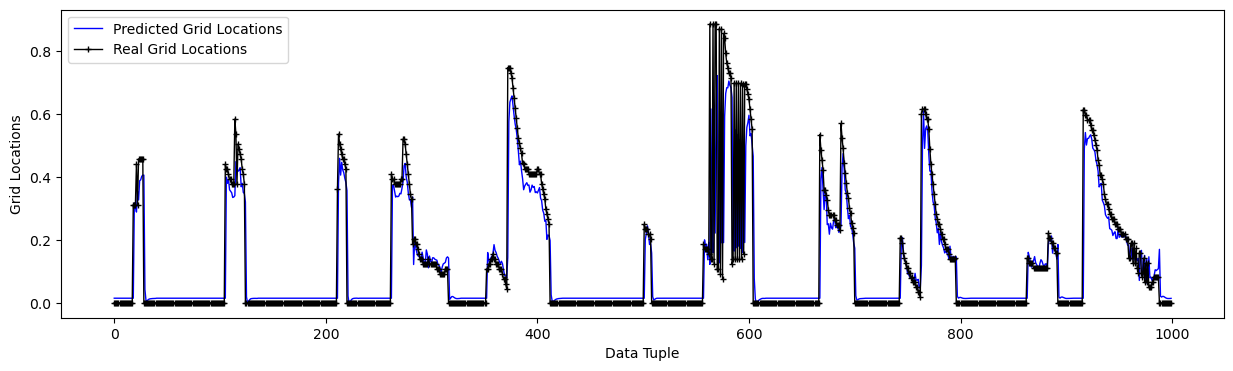

In [43]:
# code shamelessly copied from the RNN notebook. 
# Plot results from the test for the first 1000 data points
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:1000],
         linewidth=1, 
         color='blue', 
         label='Predicted Grid Locations')
plt.plot(y_test[:1000],
         linewidth=1, 
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
plt.savefig('data/grid_accuracy.png')
plt.show()


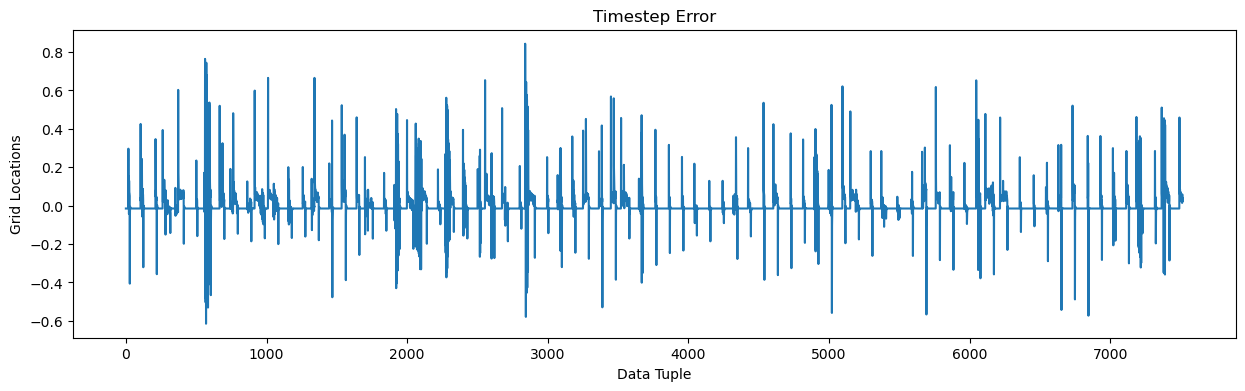

Mean difference:  0.0002460886983966774 Max difference: 0.8434890045372444


In [41]:
plt.figure(figsize=(15, 4), dpi=100)
diff = (y_test - np.reshape(pred,[len(pred)]))
plt.plot(diff)

plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')
plt.title('Timestep Error')

plt.show()

print("Mean difference: ",diff.mean(),
      "Max difference:", diff.max())

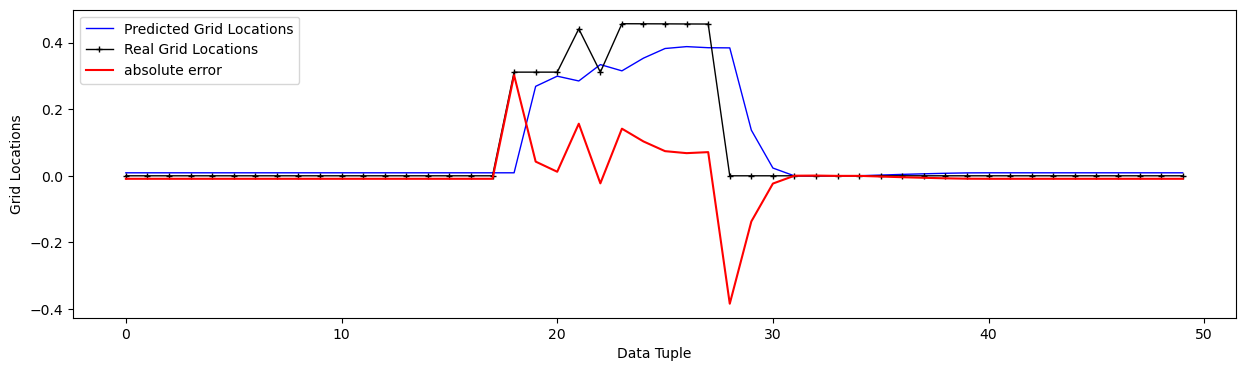

In [133]:


# code shamelessly copied from the RNN notebook. 
# Plot results from the test for the first 1000 data points
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:50],
         linewidth=1, 
         color='blue', 
         label='Predicted Grid Locations')
plt.plot(y_test[:50],
         linewidth=1, 
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
plt.plot(diff[:50],
        color = 'red',
        label = 'absolute error')

# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

(array([4.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 6.000e+00,
        1.000e+01, 1.000e+01, 1.500e+01, 1.900e+01, 3.200e+01, 2.900e+01,
        3.700e+01, 5.100e+01, 6.600e+01, 5.373e+03, 7.130e+02, 6.370e+02,
        1.860e+02, 6.700e+01, 5.100e+01, 2.300e+01, 4.500e+01, 1.700e+01,
        2.500e+01, 1.300e+01, 1.700e+01, 1.100e+01, 5.000e+00, 1.100e+01,
        1.100e+01, 4.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.56360546, -0.52828652, -0.49296758, -0.45764865, -0.42232971,
        -0.38701077, -0.35169184, -0.3163729 , -0.28105397, -0.24573503,
        -0.21041609, -0.17509716, -0.13977822, -0.10445928, -0.06914035,
        -0.03382141,  0.00149752,  0.03681646,  0.0721354 ,  0.10745433,
         0.14277327,  0.17809221,  0.21341114,  0.24873008,  0.28404901,
         0.31936795,  0.35468689,  0.39000582,  0.42532476,  0.46064369,
         0.49596263,  0.53128157,  0.5666005 ,  0.60191944,  0.6

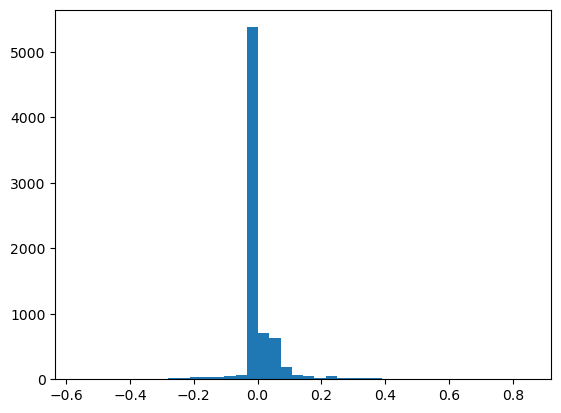

In [130]:
fig, ax = plt.subplots(1,1)

ax.hist(diff, bins = 40)

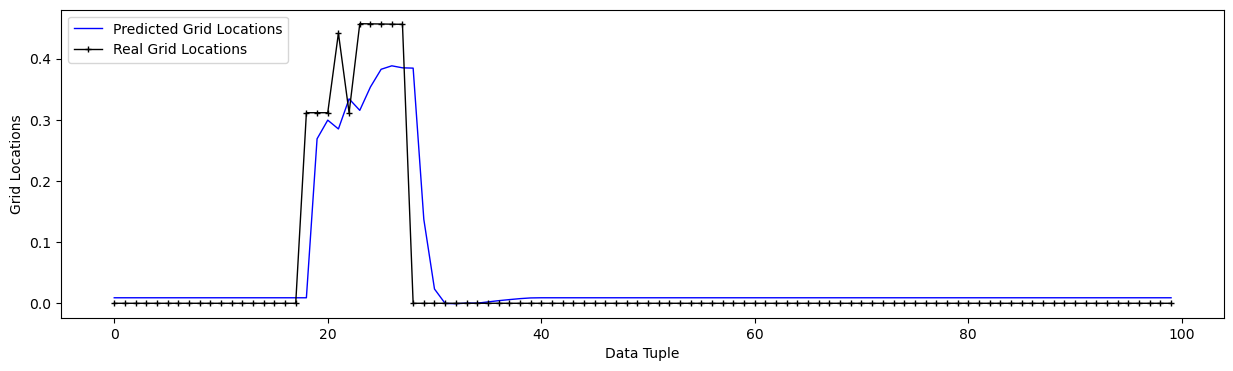

In [112]:
# code shamelessly copied from the RNN notebook. 
# Plot results from the test for the first 100 data points
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:100],
         linewidth=1, 
         color='blue', 
         label='Predicted Grid Locations')
plt.plot(y_test[:100],
         linewidth=1, 
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

In [113]:
predictions = pd.DataFrame(pred, columns = ['gridID'])
predictions.to_csv('data/prediction_results.csv')

In [114]:
# merge X_test and pred. 
print(X_test.shape)
print(pred.shape)

print(X_test[-3,-1])
print(X_test[:,-1])

# flatten X_test
#X_test.reshape(7515*12,4)

(7515, 12, 5)
(7515, 1)
[8.72733620e-05 9.15492958e-01 1.08015612e-01 9.37155379e-01
 2.96935874e-01]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 ...
 [8.72733620e-05 9.15492958e-01 1.08015612e-01 9.37155379e-01
  2.96935874e-01]
 [6.54550215e-05 9.15492958e-01 1.05785692e-01 8.25081121e-01
  2.97041171e-01]
 [4.36366810e-05 9.15492958e-01 1.16701884e-01 6.46173965e-01
  2.81246709e-01]]


In [115]:
test = pd.DataFrame(X_test[:,-1], 
                    columns=['Time', 'Min_Pressure_mbar', 'distance', 
                             'direction', 'gridID'])
test["gridID"] = pred

In [106]:
test.to_csv('data/test_results.csv')

In [ ]:
# Challenge: convert grid number to location 
# (is that even possible?)